<a href="https://colab.research.google.com/github/maskaljunas/chord_diagram_withR/blob/main/Chord_Diagram_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to use Google Colab to create a Chord Diagramm with R



There are two ways to use R in Google Colab:

1. use rpy2 package in the Python runtime by excuting the following command: 
> %load_ext rpy2.ipython

  and insert 
  > %%R 

  in every cell before your code.
  This allows you to work with both python and R in your Notebook.

2. use directly R as runtime type in the Colab Notebook by selecting *Runtime*,  *Change runtime type* to R

I will use the first option.


The Chord Diaram is based on Circular Visualization library and can be explored on its documentation [here](https://jokergoo.github.io/circlize_book/book/).

In [2]:
%load_ext rpy2.ipython

In [ ]:
%%R
# install Circular Visualization library 
install.packages("circlize")

In [ ]:
%%R
library(circlize)

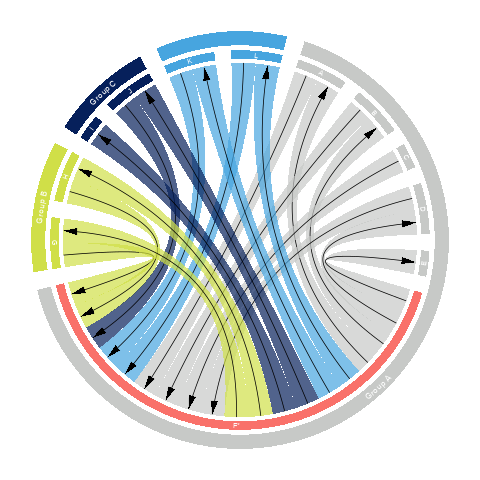

In [13]:
%%R

# create a matrix for the links: from (rows) to (columns)
matrix_A <-matrix(c(0,0,0,0,1,0,0,0,0,0,0,              
                    0,0,0,0,1,0,0,0,0,0,0,
                    0,0,0,0,1,0,0,0,0,0,0,
                    0,0,0,0,1,0,0,0,0,0,0,
                    1,1,1,1,0,1,1,1,1,1,1,
                    0,0,0,0,1,0,0,0,0,0,0,
                    0,0,0,0,1,0,0,0,0,0,0,
                    0,0,0,0,1,0,0,0,0,0,0,
                    0,0,0,0,1,0,0,0,0,0,0,
                    0,0,0,0,1,0,0,0,0,0,0), byrow = 20, nrow = 10)

# define column and row names
colnames(matrix_A) <- c("A","B","D","E","F*","G","H","I","J","K","L")
rownames(matrix_A) <- c("A","B","C","D","F*","G","H","J","K","L")

# creates a dataframe from matrix
df = data.frame(from = rep(rownames(matrix_A), times = ncol(matrix_A)),
    to = rep(colnames(matrix_A), each = nrow(matrix_A)),
    value = as.vector(matrix_A),
    stringsAsFactors = FALSE)

# define groups within the  
names_A = c("A","B","C","D","E", "F*")
names_B = c("G", "H")
names_C = c("I","J")
names_ = c("L","K")

nm = unique(unlist(dimnames(matrix_A)))
group = structure(gsub("\\0\\d", "", nm), names = nm)

# rotate
circos.par(start.degree = 72)


grid.col = c(L = "#47a5df", K = "#47a5df", A = "#c7c9c7",B = "#c7c9c7", C = "#c7c9c7", D = "#c7c9c7", E = "#c7c9c7", G = "#d0df48", H = "#d0df48", F ="#e56b1f", I = "#06205b", J = "#06205b")

# vector with respecting colors, usually the links get the color they are going from
col = c("#000000", "#000000", "#000000" ,"#000000" ,"#c7c9c7","#000000", "#000000", "#000000", "#000000" ,"#000000" ,"#000000" ,"#000000", "#000000",
 "#000000", "#c7c9c7", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#c7c9c7", "#000000",
 "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#c7c9c7", "#000000", "#000000", "#000000", "#000000",
 "#000000", "#c7c9c7", "#c7c9c7", "#c7c9c7", "#c7c9c7", "#000000", "#d0df48", "#d0df48", "#06205b", "#47a5df", "#47a5df", "#000000", "#000000",
 "#000000", "#000000", "#d0df48", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#d0df48",
 "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#06205b", "#000000", "#000000", "#000000",
 "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#06205b", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000",
 "#000000", "#000000", "#000000", "#47a5df", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000", "#000000",
 "#47a5df", "#000000", "#000000", "#000000", "#000000", "#000000")


#directional = 1, link.target.prop = TRUE,
par(mfrow = c(1, 1))
chordDiagram(df, grid.col = grid.col,col = col, transparency = 0.3,group = group,big.gap = 5,directional = 1,direction.type = "arrows",
    annotationTrack = c("grid"), 
    preAllocateTracks = list(link.sort = TRUE,
        track.height = mm_h(5),
        track.margin = c(mm_h(1), 0)))


# horizontal line
circos.track(track.index = 2, panel.fun = function(x, y) {
    sector.index = get.cell.meta.data("sector.index")
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    circos.text(col="white",mean(xlim), mean(ylim), sector.index, cex = 0.6, niceFacing = TRUE)
}, bg.border = NA)

# name your groups
highlight.sector(names_A, track.index = 1, col = "#c7c9c7",
    text = " Group A", cex = 0.7, text.col = "white", niceFacing = TRUE, facing = "bending.inside")

highlight.sector(names_, track.index = 1, col = "#47a5df",
    text = " ", cex = 0.7, text.col = "white", niceFacing = TRUE)

highlight.sector(names_C, track.index = 1, col = "#06205b",
    text = "Group C", cex = 0.7, text.col = "white", niceFacing = TRUE, facing = "bending.inside")

highlight.sector(names_B, track.index = 1, col = "#d0df48",
    text = "Group B", cex = 0.7, text.col = "white", niceFacing = TRUE, facing = "bending.inside")

circos.clear()
